In [1]:
# Import dependencies.
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import r2_score, accuracy_score, classification_report
import sklearn.metrics as metrics
import eli5
from eli5.sklearn import PermutationImportance
import seaborn as sns
%matplotlib inline

In [2]:
# Import CSV.  Visualize some data.
# Data from: https://www.kaggle.com/ronitf/heart-disease-uci#heart.csv
df = pd.read_csv("Resources/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Columns:
- `age` in years
- `sex` (1 = male; 0 = female)
- `cp` chest pain type
- `trestbps` resting blood pressure (in mm Hg on admission to the hospital)
- `chol` serum cholestoral in mg/dl
- `fbs` (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- `restecg` resting electrocardiographic results
- `thalach` maximum heart rate achieved
- `exang` exercise induced angina (1 = yes; 0 = no)
- `oldpeak` ST depression induced by exercise relative to rest
- `slope` the slope of the peak exercise ST segment
- `ca` number of major vessels (0-3) colored by flourosopy
- `thal` 3 = normal; 6 = fixed defect; 7 = reversable defect
- `target` 1 or 0 (I think this means 1= heart attack; 0=no heart attack)

## Inspect.

In [3]:
# Inspect datatypes.
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [4]:
# Check out description.
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
# Check out if there are any null values.
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
# Columns being used for X_train/X_test
columns_list = df.columns.tolist()[:13]
columns_list

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

<b>Summary of data:</b>
    - No missing data
    - No categorical data

## Visualize.

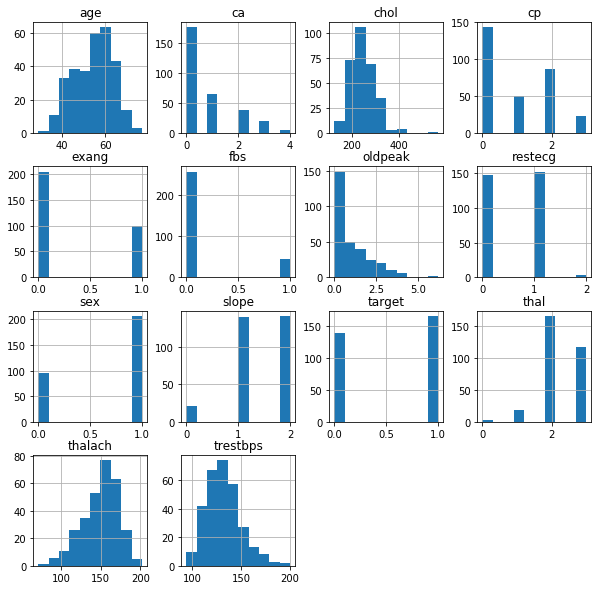

In [7]:
df.hist(figsize=(10,10));

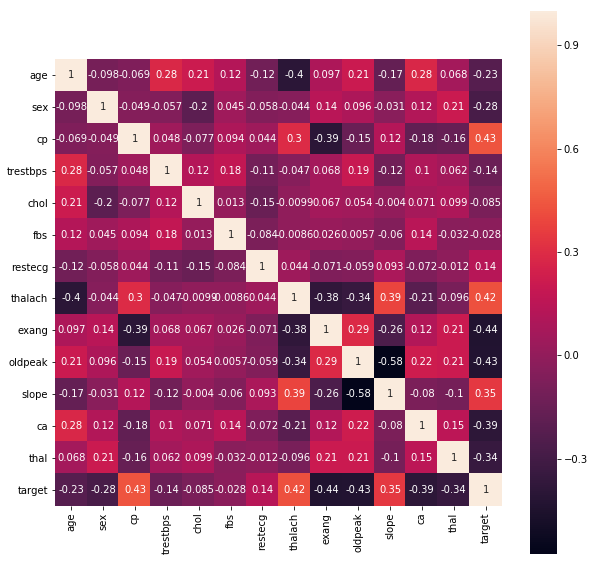

In [8]:
# Heatmap of the data to look for correlations.
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, square=True);

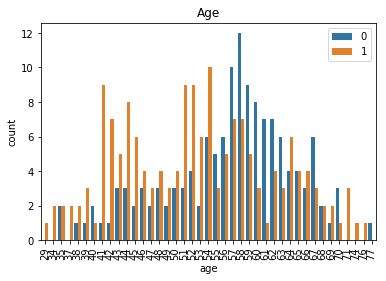

In [9]:
# Age as an indicator for heart attack?
sns.countplot(x="age", data=df, hue="target");
plt.xticks(rotation=90);
plt.legend(loc="upper right");
plt.title("Age");

This plot considers age and its role as an indicator for heart attack.  The legend indicates heart attack (1) v. no heart attack (0).  In this case, the graph indicates that there is little to correlation of age as an indicator for heart attack.  This is further evidenced by the heat map having a negative correlation value of -0.23.

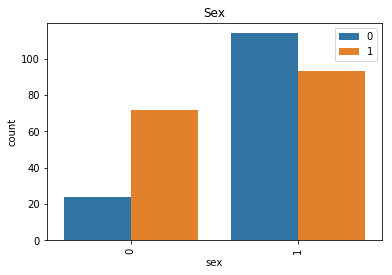

In [10]:
# Sex as an indicator for heart attack?
sns.countplot(x="sex", data=df, hue="target");
plt.xticks(rotation=90);
plt.legend(loc="upper right");
plt.title("Sex");

In [11]:
# Check out the ratio of females to males.
df["sex"].value_counts()/len(df)

1    0.683168
0    0.316832
Name: sex, dtype: float64

This plot considers sex and its role as an indicator for heart attack.  First, it appears that the data is skewed to males, meaning, that there are more males in this study compared to females.  In fact, the ratio of males to females is 2:1.  Second, the female population has a higher rate of heart attacks; the male population has a lower rate of heart attacks.  Due to this discrepancy, the heatmap reads this as not having a positive correlation.  In other words, heatmap is indicating that sex is not an indicator of having a heart attack (-0.28).

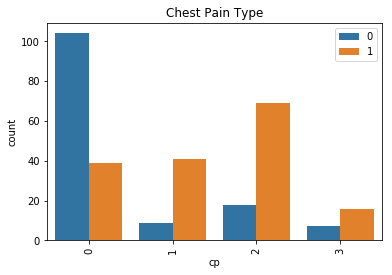

In [12]:
# Chest Pain Type as an indicator for heart attack?
sns.countplot(x="cp", data=df, hue="target");
plt.xticks(rotation=90);
plt.legend(loc="upper right");
plt.title("Chest Pain Type");

In [13]:
# If you're having chest pains (cp>=1) what is ratio of having a heart attack(1)?
holder = df.groupby(["cp", "target"]).count()["age"]

# Find total number of cp with target=1.
total = 0
for i in range(1, 4):
    for j in range(1, 2):
        want = holder[i, j]
        total += want
        
cp_0_t1 = holder[0, 1]
cp_0_t0 = holder[0, 0]

print (f"Number of cp with heart attacks: {total}")
print (f"Ratio of cp with heart attacks to no heart attacks: {total/(holder.sum() - cp_0_t1 - cp_0_t0)}")

Number of cp with heart attacks: 126
Ratio of cp with heart attacks to no heart attacks: 0.7875


This plot considers chest pain type as an indicator for heart attack.  For data where cp is 1 or higher, the incidence of heart attack is high.  For data were cp is 0, the value of 0 indicates that there is no chest pain and correlates strongly with the absence of heart attack.  According to the heatmap, the value for cp is 0.43, a positive correlation.  That means that cp is an indicator of having a heart attack.

<b>Summary of Visualizations:</b>
    - Considering the various columns in reference to `target`, there are a few positive and negative relationships.
        * notable positive relationships include: cp, thalach, and slope.
        * notable negative relationships include: age, sex, exang, oldpeak, ca, and thal.

## Models!

In [14]:
# Consolidate the split of data.
def data_split(df, ts, rs):
    '''
    INPUT
    - df (dataframe)
    - ts = test_size
    - rs = random_state
    
    OUTPUT
    - X_train, X_test, y_train, y_test
    
    This function does the following:
    1. Split df into X and y.
    2. Split into train and test sets (test_size=0.33, random_state=42)
    '''
    # Split the data for X and y.
    y = df["target"]
    X = df.drop("target", axis=1)
    
    # Split data into test and train.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ts, random_state=rs)
    
    return X_train, X_test, y_train, y_test

In [15]:
# Try a linear regression model.
def linear_reg(df):
    '''
    INPUT
    - df (dataframe)
    
    OUTPUT
    - r2_scores_test, r2_scores_train
    
    This function does the following:
    1. Grab the split data using data_split.
    2. Fit the Linear Regression model with normalization.
    3. Run prediction.
    4. Find r2_scores for test and train to determine if overfitting.
    '''
    # Grab data.
    X_train, X_test, y_train, y_test = data_split(df, 0.33, 42)
    
    # Fit the Linear Regression model.
    model = LinearRegression(normalize=True)
    model.fit(X_train, y_train)
    
    # Prediction.
    prediction_train = model.predict(X_train)
    prediction_test = model.predict(X_test)
    
    # Find r2_scores for test and train.
    r2_scores_train = r2_score(y_train, prediction_train)
    r2_scores_test = r2_score(y_test, prediction_test)
    
    return r2_scores_train, r2_scores_test

In [16]:
# Run Linear Regression.
linear_reg(df)

(0.5577383438031281, 0.3046137957359223)

Linear regression doesn't seem like a good model for this.  The train numbers aren't so good.  Try another model type.

In [17]:
# Try logistic regression with scaled data.
def logistic_reg_scale(df):
    '''
    INPUT
    - df (dataframe)
    
    OUTPUT
    - accuracy_train, accuracy_test
    
    This function does the following:
    1. Grab the split data using data_split.
    3. Scale the data.
    4. Fit the Logistic Regression model with normalization.
    5. Run prediction.
    6. Find r2_scores for test and train to determine if overfitting.
    '''
    # Split data into test and train.
    X_train, X_test, y_train, y_test = data_split(df, 0.2, 42)
    
    # Scale the data.
    scale = StandardScaler()
    X_train_scale = scale.fit_transform(X_train)
    X_train = pd.DataFrame(X_train_scale)
    X_test_scale = scale.fit_transform(X_test)
    X_test = pd.DataFrame(X_test_scale)
    
    # Fit the Logistic Regression model.
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    # Prediction.
    prediction_train = model.predict(X_train)
    prediction_test = model.predict(X_test)
    
    # Find r2_scores for test and train.
    accuracy_train = accuracy_score(y_train, prediction_train)
    accuracy_test = accuracy_score(y_test, prediction_test)
    
    a = f"Train \n {classification_report(y_train, prediction_train)}"
    b = f"Test \n {classification_report(y_test, prediction_test)}"
    return a, b, accuracy_train, accuracy_test, X_train, y_train, model, X_test, y_test

In [18]:
# The output keys need to be changed to a string.  
columns_dict = {}
for x in range(13):
    columns_dict[x] = columns_list[x]
columns_dict

{0: 'age',
 1: 'sex',
 2: 'cp',
 3: 'trestbps',
 4: 'chol',
 5: 'fbs',
 6: 'restecg',
 7: 'thalach',
 8: 'exang',
 9: 'oldpeak',
 10: 'slope',
 11: 'ca',
 12: 'thal'}

In [19]:
# Run Logistic Regression on data.
a, b, accuracy_train, accuracy_test, X_train, y_train, model, X_test, y_test = logistic_reg_scale(df)
X_train = X_train.rename(columns=columns_dict)

# Print some outputs (accuracy, classification report).
print (accuracy_train)
print (accuracy_test)
print (" ")
print (a)
print (b)

# Find ranked features.
perm = PermutationImportance(model).fit(X_train, y_train)
thing1 = eli5.show_weights(perm, feature_names = X_train.columns.tolist())
thing1

0.8636363636363636
0.8852459016393442
 
Train 
               precision    recall  f1-score   support

           0       0.89      0.80      0.84       109
           1       0.85      0.92      0.88       133

   micro avg       0.86      0.86      0.86       242
   macro avg       0.87      0.86      0.86       242
weighted avg       0.87      0.86      0.86       242

Test 
               precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

   micro avg       0.89      0.89      0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Applications/anacon

Weight,Feature
0.0686 ± 0.0307,cp
0.0504 ± 0.0198,sex
0.0446 ± 0.0096,ca
0.0364 ± 0.0389,oldpeak
0.0347 ± 0.0349,thal
0.0215 ± 0.0110,slope
0.0190 ± 0.0231,thalach
0.0157 ± 0.0242,trestbps
0.0140 ± 0.0124,restecg
0.0116 ± 0.0288,exang


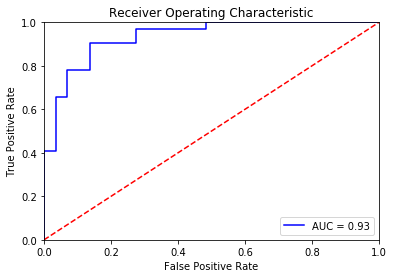

In [20]:
# Graph the ROC
# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [21]:
# Try SVC.
def svc_model(df):
    '''
    INPUT
    - df (dataframe)
    
    OUTPUT
    - classification report train, classification report test, accuracy_train, 
      accuracy_test, X_train, y_train, model, X_test, y_test
    
    This function does the following:
    1. Grab the split data using data_split.
    2. Scale the data.
    3. Fit the SVC model with normalization.
    4. Run prediction.
    5. Do classification report, accuracy for test and train to determine if overfitting.
    '''
    # Grab the data.
    X_train, X_test, y_train, y_test = data_split(df, 0.2, 42)
    
    # Fit the SVC model.
    model = SVC(probability=True, kernel="linear", C=0.15)
    model.fit(X_train, y_train)
    
    # Prediction.
    prediction_train = model.predict(X_train)
    prediction_test = model.predict(X_test)
    
    # Find accuracy_scores for test and train.
    accuracy_train = accuracy_score(y_train, prediction_train)
    accuracy_test = accuracy_score(y_test, prediction_test)
    
    a = f"Train \n {classification_report(y_train, prediction_train)}"
    b = f"Test \n {classification_report(y_test, prediction_test)}"
    return a, b, accuracy_train, accuracy_test, X_train, y_train, model, X_test, y_test

In [22]:
# Run SVC on data.
a, b, accuracy_train, accuracy_test, X_train, y_train, model, X_test, y_test = svc_model(df)

# Print some outputs (accuracy, classification report).
print (accuracy_train)
print (accuracy_test)
print (" ")
print (a)
print (b)

# Find ranked features.
perm = PermutationImportance(model).fit(X_train, y_train)
thing2 = eli5.show_weights(perm, feature_names = X_train.columns.tolist())
thing2

0.8553719008264463
0.8688524590163934
 
Train 
               precision    recall  f1-score   support

           0       0.89      0.77      0.83       109
           1       0.83      0.92      0.88       133

   micro avg       0.86      0.86      0.86       242
   macro avg       0.86      0.85      0.85       242
weighted avg       0.86      0.86      0.85       242

Test 
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

   micro avg       0.87      0.87      0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



Weight,Feature
0.0711 ± 0.0191,ca
0.0686 ± 0.0213,cp
0.0446 ± 0.0110,oldpeak
0.0347 ± 0.0153,thal
0.0215 ± 0.0132,sex
0.0198 ± 0.0121,slope
0.0165 ± 0.0234,trestbps
0.0149 ± 0.0040,thalach
0.0058 ± 0.0193,exang
0.0008 ± 0.0081,restecg


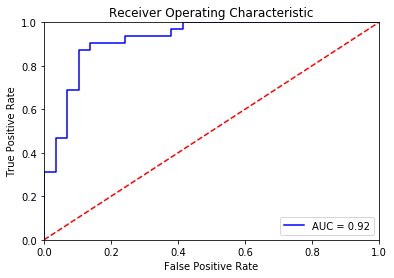

In [23]:
# Graph the ROC
# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Logistic regression seems to be the slightly better model, edging out the svc model.  Here, I have the models in their optimized forms.  I did not include models that were low in accuracy (with the exception of the Linear Regression, a starting point).